In [1]:
## import necessary libraries and supress the warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
## Read and validate the data set
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# renaming the columns for better understanding
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# dropping some tables which were not required and as per given in the problem statement 
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
#Encoding the columns
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [11]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [12]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [13]:
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [14]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Visualisation of data 

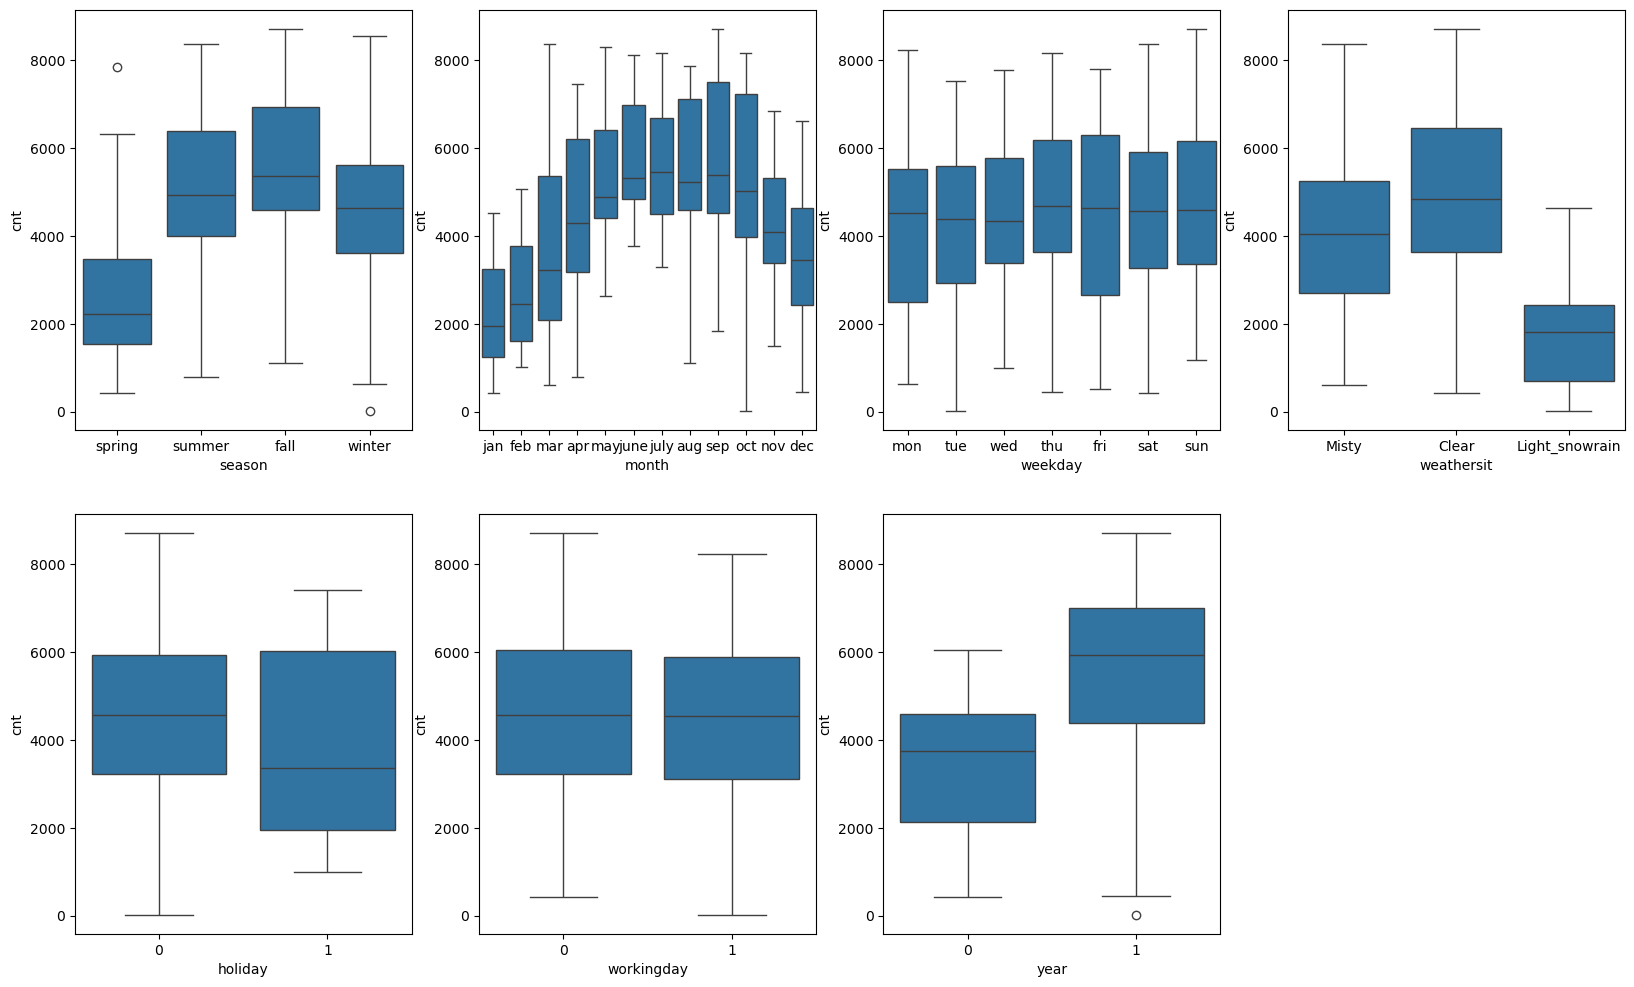

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

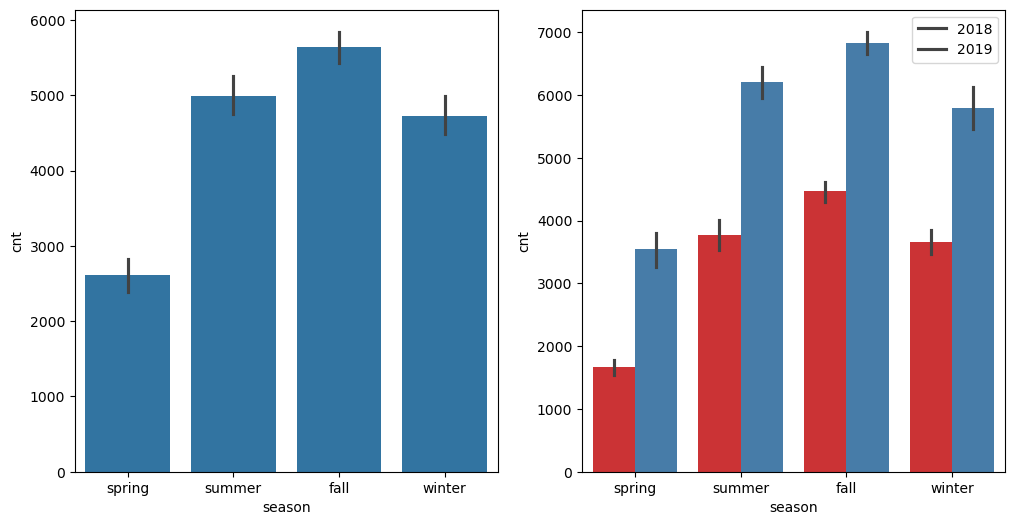

In [18]:
# creating and comparing the catogorical varaibles
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'season',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'season', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [19]:
#Fall has the highest bicycle bookings and the bookings were on raise across all seasons between 2018 and 2019

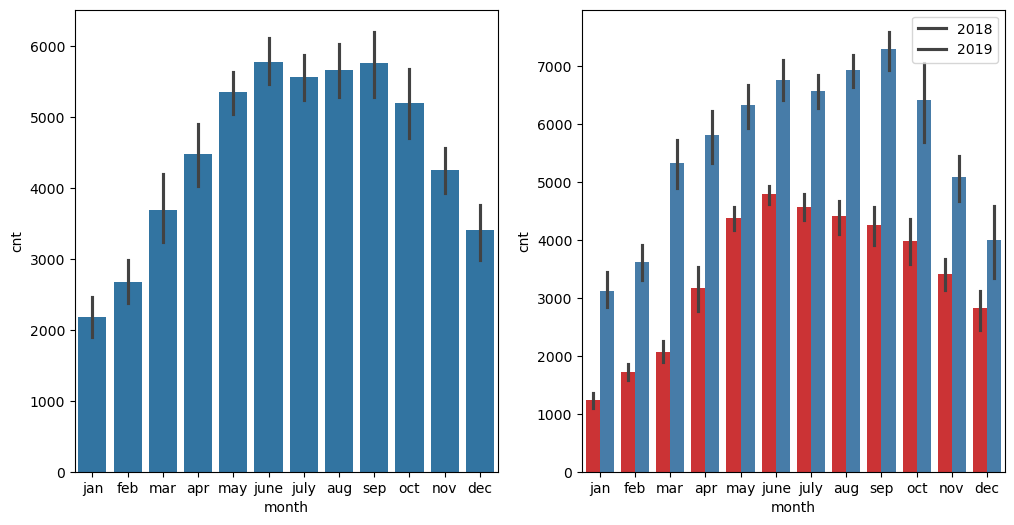

In [20]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'month',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'month', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [21]:
#Between June to September the bookings were at peak and we see there is a growth across all the months between the years 2018 and 2019

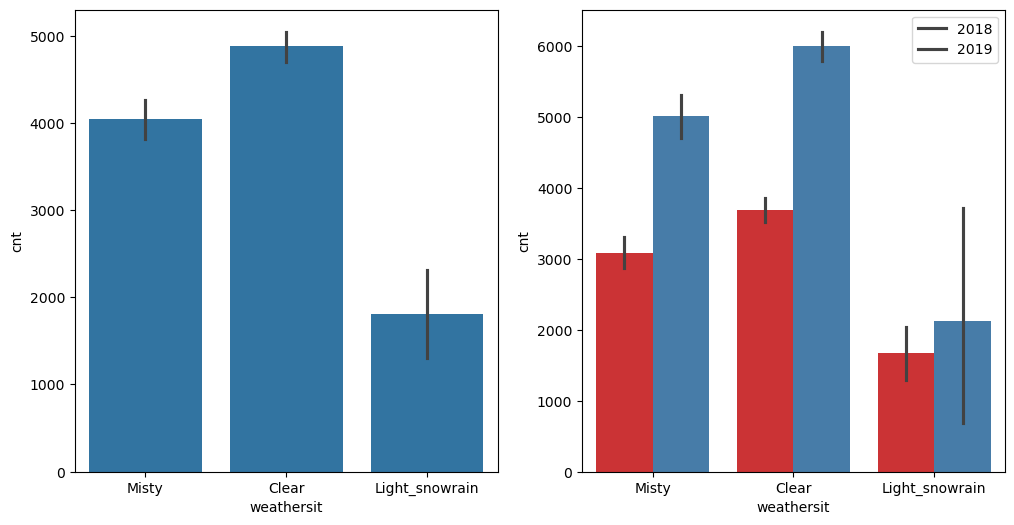

In [22]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [23]:
# Clear weather situation has highest bookings and it is very clearly visible that the growth of bookings were on raise between the years 2018 and 2019

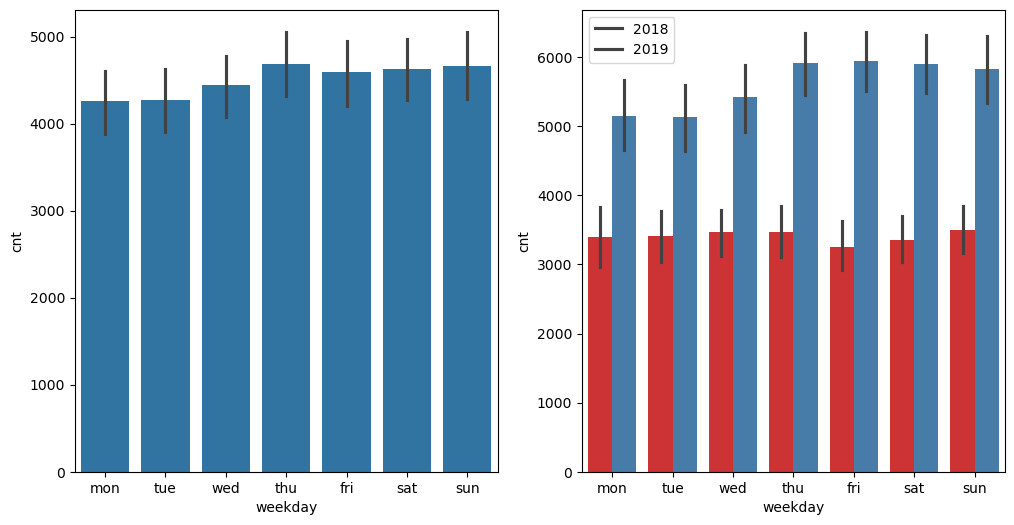

In [24]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'weekday',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [26]:
#Thursday sees the peak bookings and continous the trend till sunday on the other hand we see the overall bookings were on raise between the years 2018 and 2019

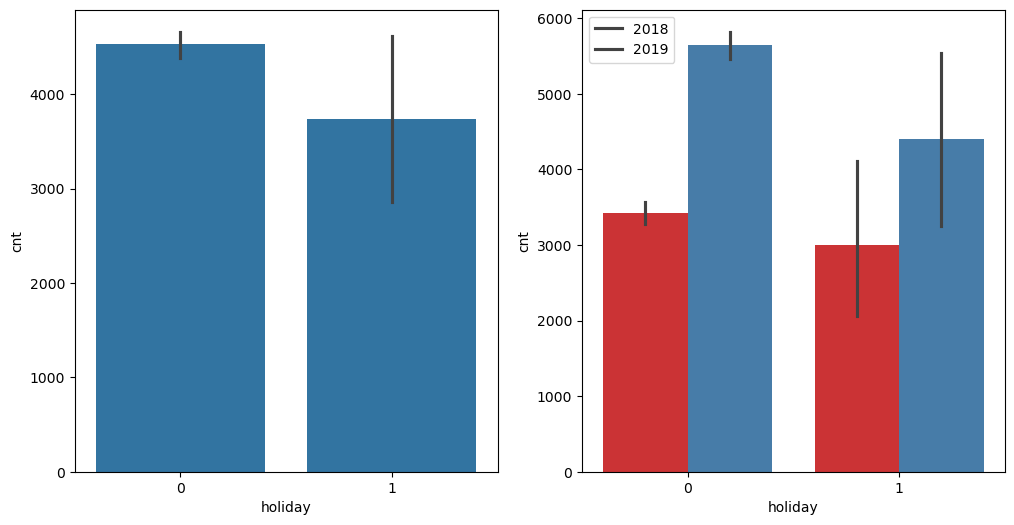

In [27]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [28]:
#working day has the highest number of bookings rather than on holiday because lot of people commute to work on the bike rather than on the free time, on the other hand we see the bookings were on rise between the years 2018 and 2019

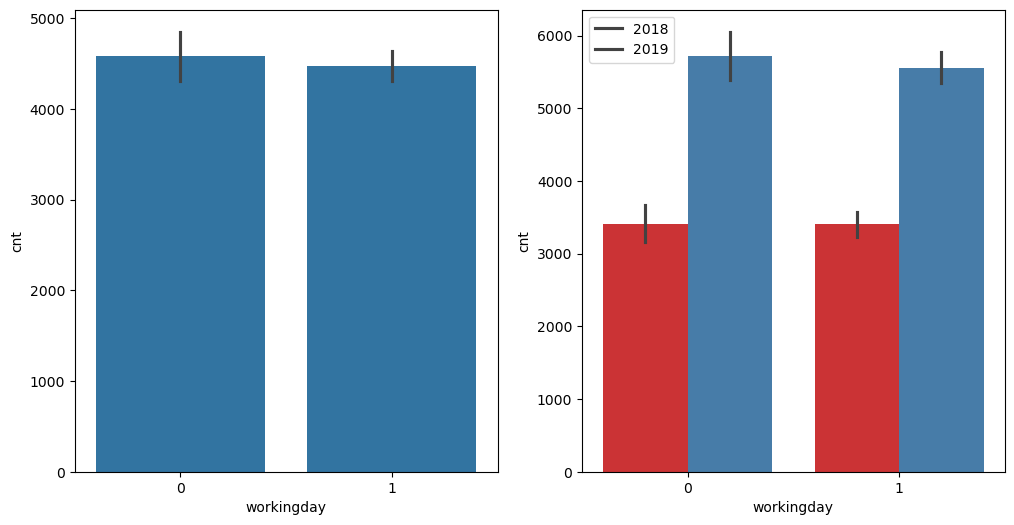

In [29]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'workingday',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [30]:
# I feel the difference between the working day = yes and working day = no has no major change in number of bookings, however it is too evident that the YOY bookings number increased from 2018 to 2019

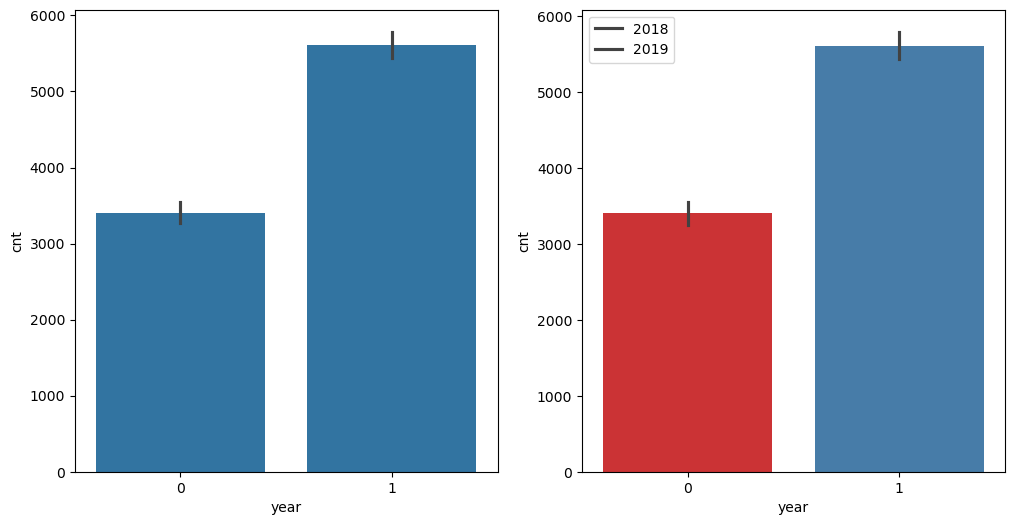

In [31]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'year',y = 'cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x = 'year', y= 'cnt',data=df, hue='year',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

In [32]:
# 2019 has witnessed the growth in no.of bookings comparing 2018, shows the business is progressing positively

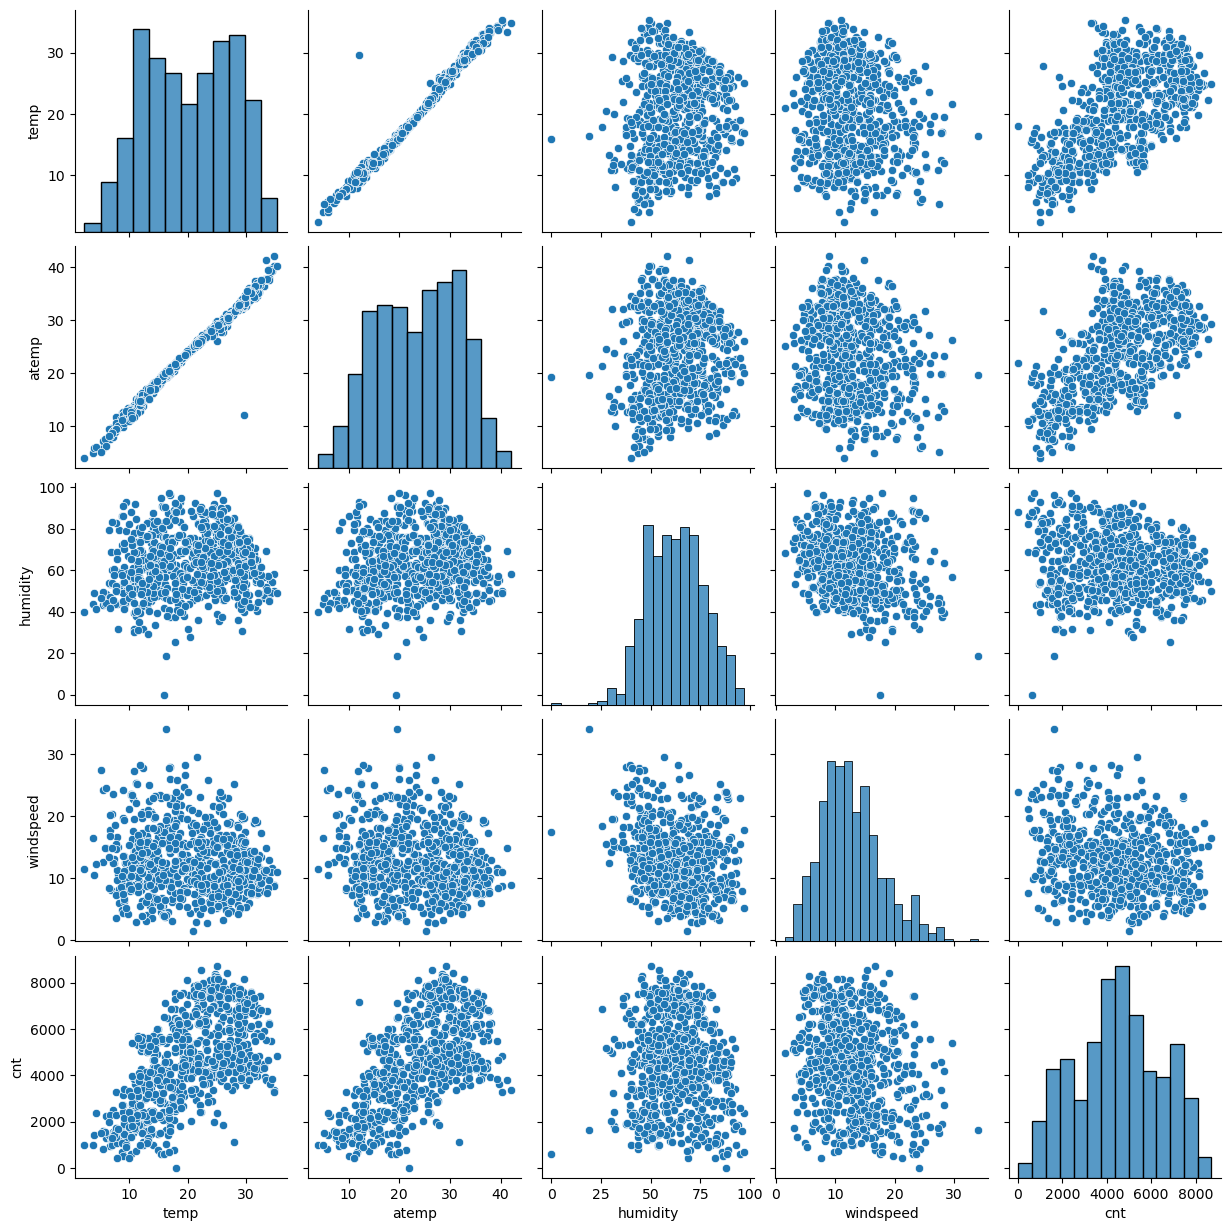

In [33]:
# analysing the numerical columns
sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [34]:
# seems like all the numericals columsn were directly proportionate to each other, to analyse further let us look at the correlation using heat map

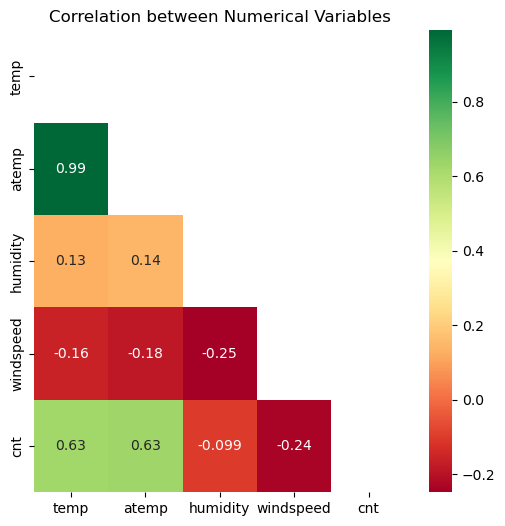

In [35]:
plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [36]:
#There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

# Data preparation before building a model

In [96]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True, dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True, dtype = int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True, dtype = int)
seasons_df=pd.get_dummies(df.season,drop_first=True, dtype = int)

In [97]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
# let us club all the dummy values together
df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# delete the columns which were appended with the dummy values
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [100]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
df_new.shape

(730, 30)

# splitting the data in to train and test datasets

In [102]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [103]:
df_train.shape

(510, 30)

In [104]:
df_test.shape

(220, 30)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [107]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


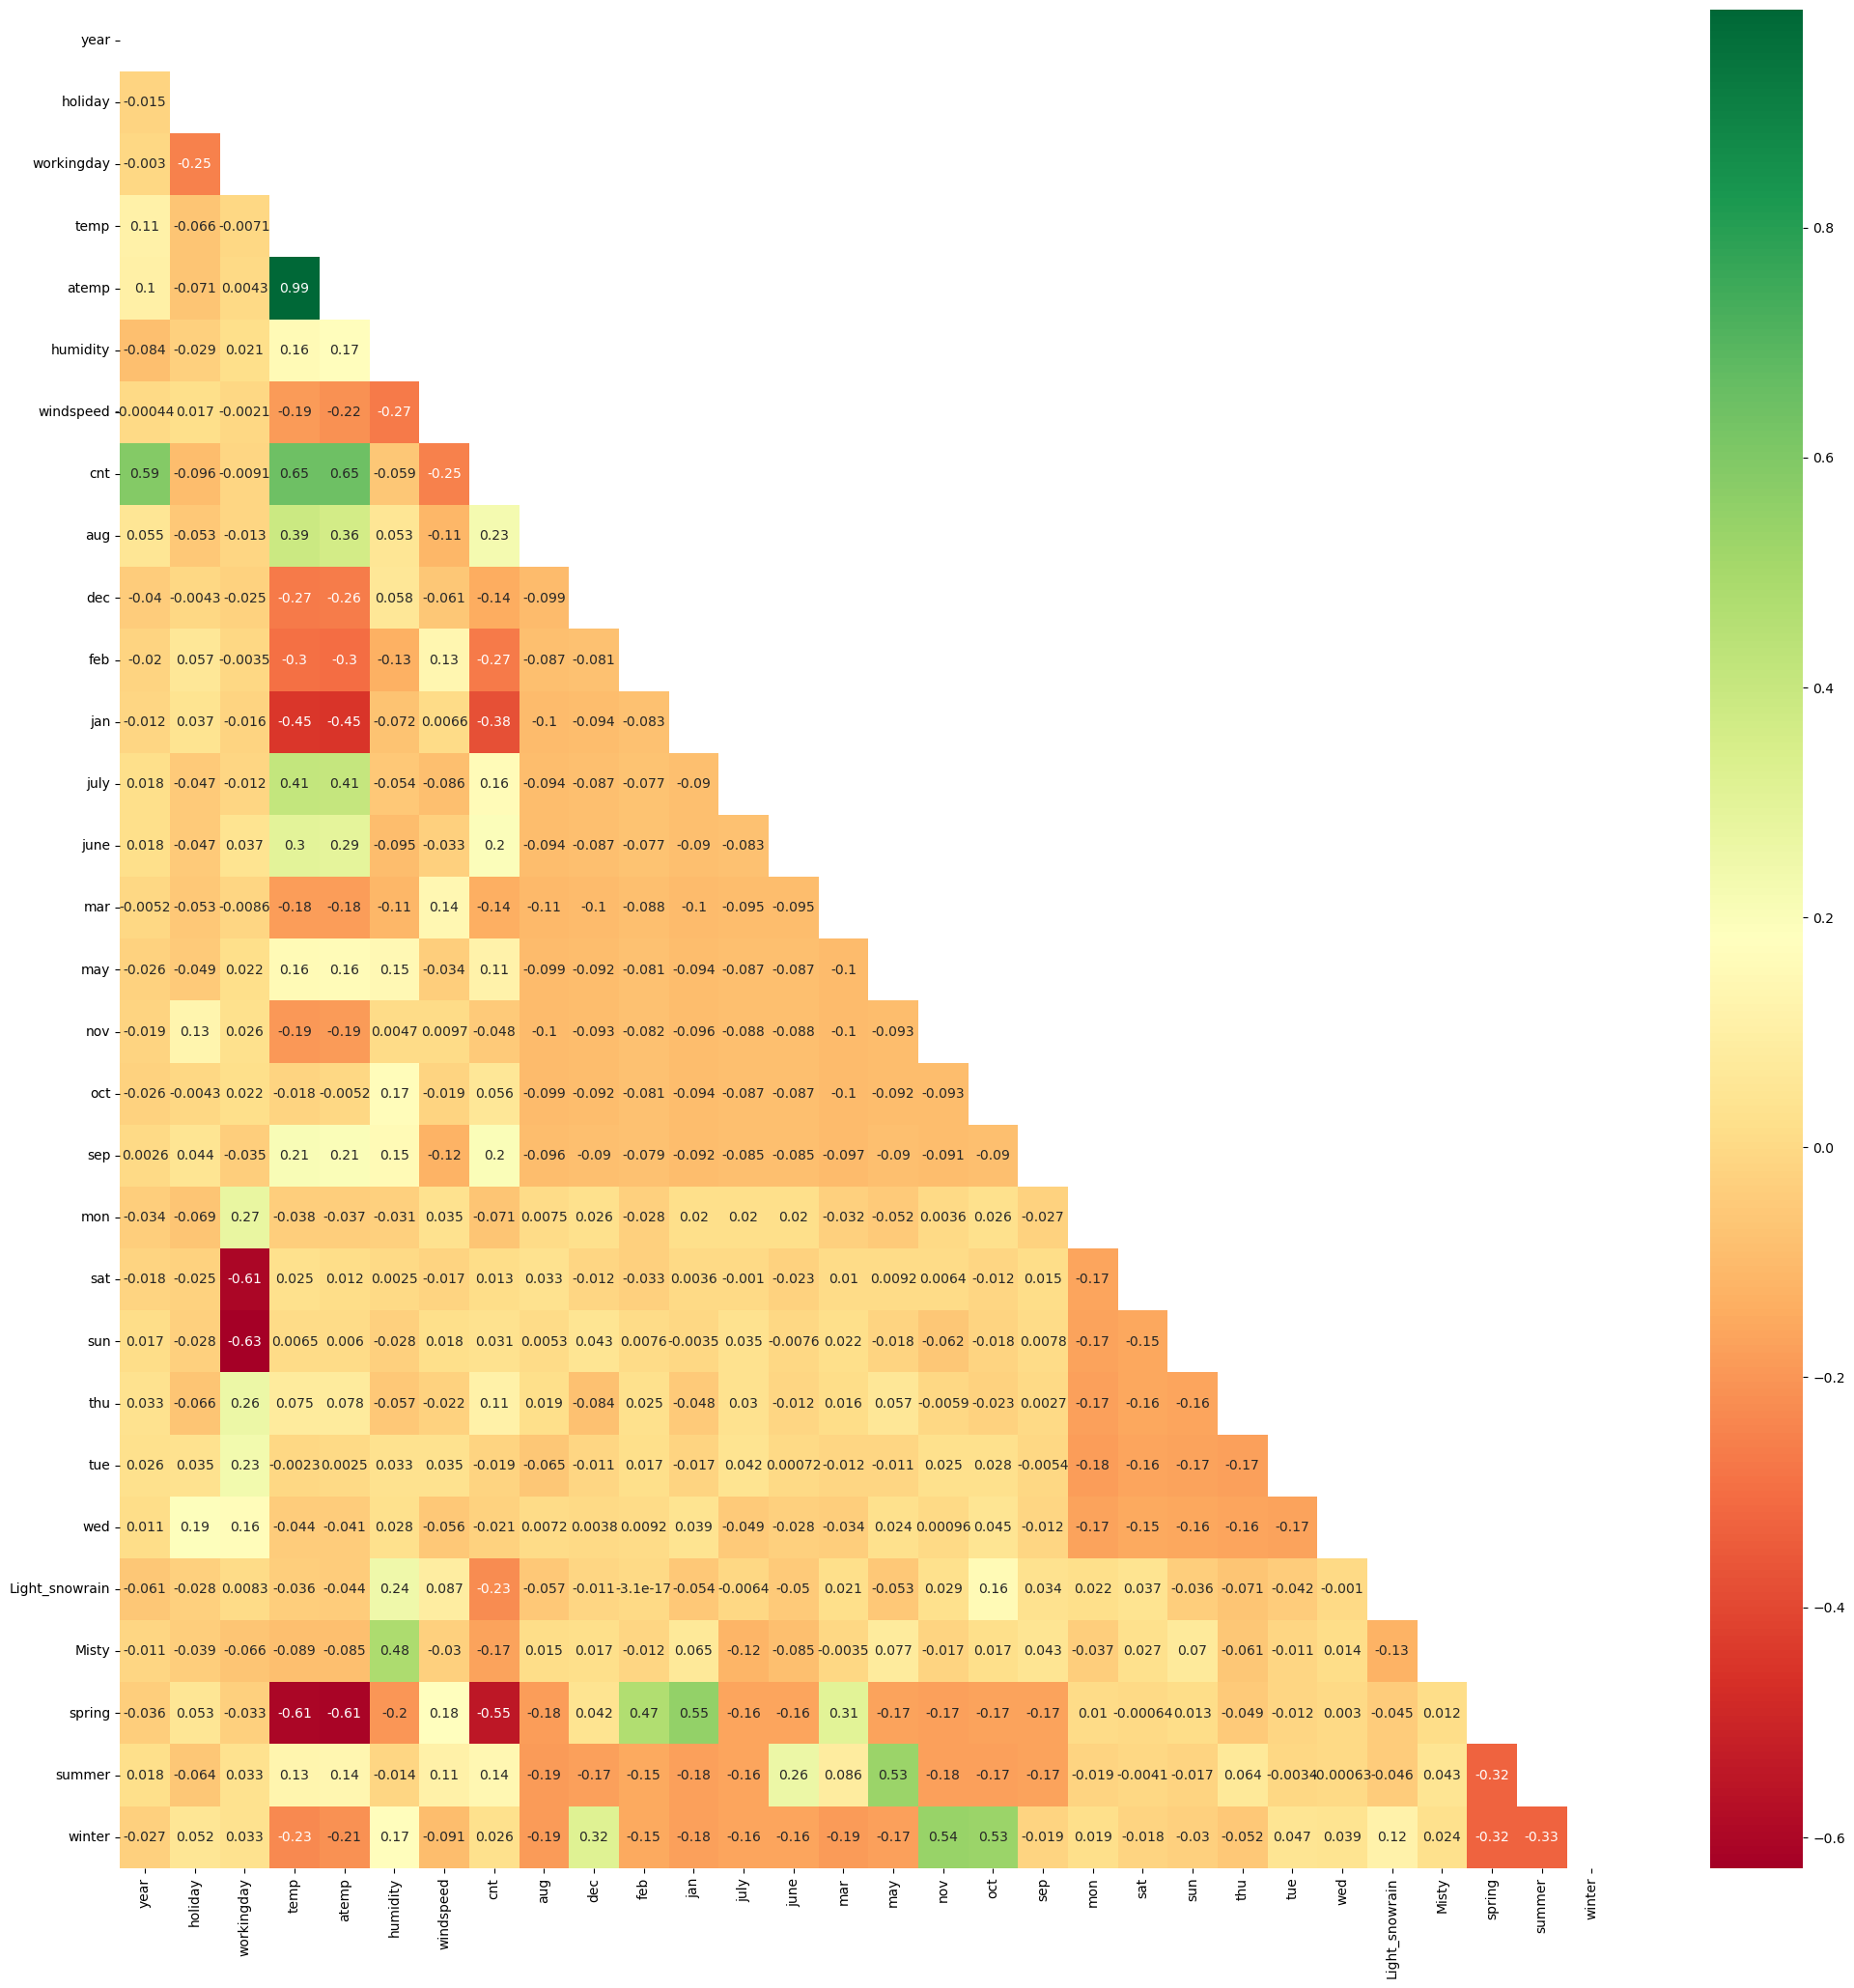

In [108]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

In [109]:
# Winter is correlated with Nov, Oct; Summer is correlated with May; Spring is correlated with Jan and Feb; Misty is correlated with Humidity
#cnt is correlated with year, temp and atemp; 

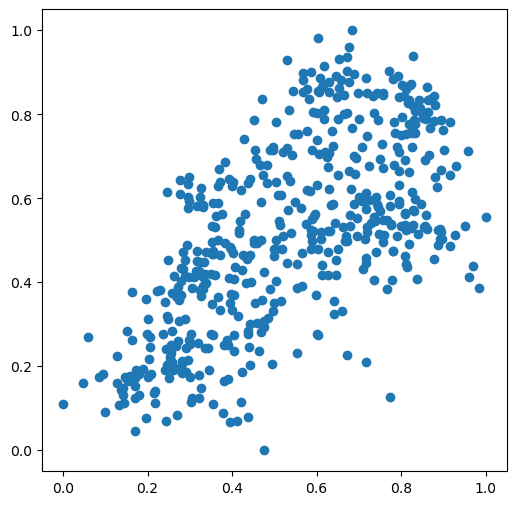

In [110]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [111]:
# cnt and temp shows the positive correlation

In [112]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
df_train.isnull().sum()

year              0
holiday           0
workingday        0
temp              0
atemp             0
humidity          0
windspeed         0
cnt               0
aug               0
dec               0
feb               0
jan               0
july              0
june              0
mar               0
may               0
nov               0
oct               0
sep               0
mon               0
sat               0
sun               0
thu               0
tue               0
wed               0
Light_snowrain    0
Misty             0
spring            0
summer            0
winter            0
dtype: int64

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   humidity        510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    float64
 8   aug             510 non-null    int32  
 9   dec             510 non-null    int32  
 10  feb             510 non-null    int32  
 11  jan             510 non-null    int32  
 12  july            510 non-null    int32  
 13  june            510 non-null    int32  
 14  mar             510 non-null    int32  
 15  may             510 non-null    int32  
 16  nov             510 non-null    int32  
 17  oct             510 non-null    int32 

In [115]:
# Building a linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [116]:
# Recursive feature elimination 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [117]:
rfe = RFE(lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [119]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [120]:
# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [121]:
# let us caluculated the VIF of the variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 
x_train_rfe = X_train[col]


In [123]:
calculateVIF(x_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


# Analysing by building a Linear Regression model

In [125]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.15e-189
Time:                        18:43:45   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [127]:
#As humidity shows the highest VIF lets drop that and ierate the model again 
x_train_new = x_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(x_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


In [128]:
X_train_lm_2 = sm.add_constant(x_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.15e-189
Time:                        18:47:07   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [129]:
# Dec has the high P- value let us drop it 
x_train_new = x_train_new.drop(['dec'], axis = 1)
calculateVIF(x_train_new)


,Features,VIF
2,temp,5.15
3,windspeed,4.67
10,spring,2.76
12,winter,2.28
11,summer,2.24
0,year,2.07
4,jan,1.61
6,nov,1.60
5,july,1.59
9,Misty,1.56


In [130]:
x_train_lm3 = sm.add_constant(x_train_new)
lr_3 = sm.OLS(y_train, x_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.93e-186
Time:                        18:55:39   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2208      0.031      7.

In [131]:
# Let us drop the highest P Value Nov
x_train_new = x_train_new.drop(['nov'], axis = 1)
calculateVIF(x_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [132]:
x_train_lm4 = sm.add_constant(x_train_new)
lm_4 = sm.OLS(y_train,x_train_lm4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.14e-187
Time:                        18:58:18   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [133]:
# Let us drop another high p value item to get the model trained well
x_train_new = x_train_new.drop(['jan'], axis = 1)
calculateVIF(x_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [134]:
x_train_lm5 = sm.add_constant(x_train_new)
lm_5 = sm.OLS(y_train, x_train_lm5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          5.06e-187
Time:                        19:01:03   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [136]:
# Let us drop another high p value variable and see if that gives the best model
x_train_new = x_train_new.drop(['july'], axis = 1)
calculateVIF(x_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [137]:
x_train_lm6 = sm.add_constant(x_train_new)
lm6 = sm.OLS(y_train, x_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.47e-186
Time:                        19:04:47   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

In [189]:
x_train_lm6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


# Let's consider this model 6 as we have seen the multicolinearity was highly reduced between the predictors and the p-values
# Additionally we see that none of the p values were greater than 0.05 and the VIF were also less than or equal to 5
# We see that the F-statistic value is greater than 1 and the Prob(F-statistic) value is near to zero

In [140]:
lm6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

# Residual analysis for train data and alidation

In [141]:
x_train_lm6

,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [145]:
y_train_pred = lm6.predict(x_train_lm6)

In [143]:
#Normality of Error terms

Text(0.5, 0, 'Errors')

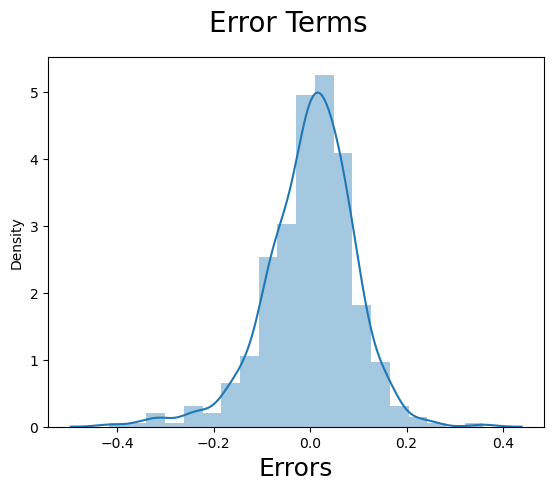

In [146]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

# Multi colinearity

In [147]:
calculateVIF(x_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


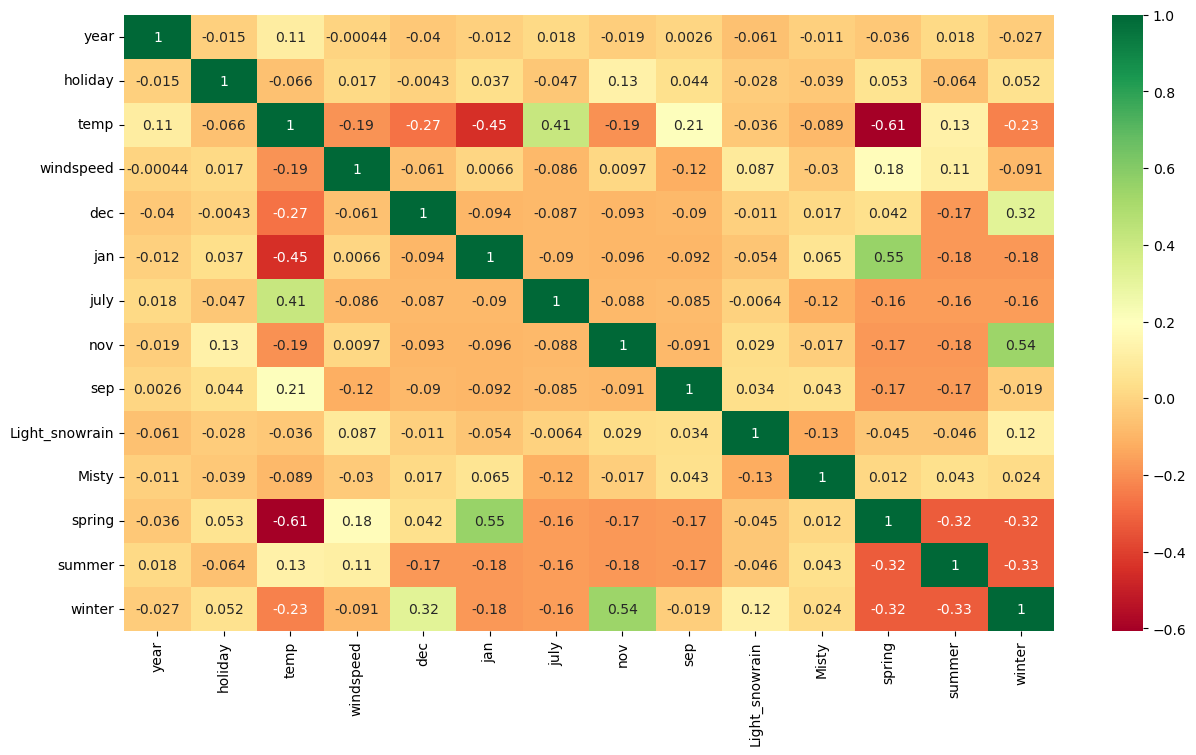

In [148]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [149]:
# From the above it is clearly visible that the VIF is lessthan 5 and there are no multicolinearity between the varaibles in the heat map

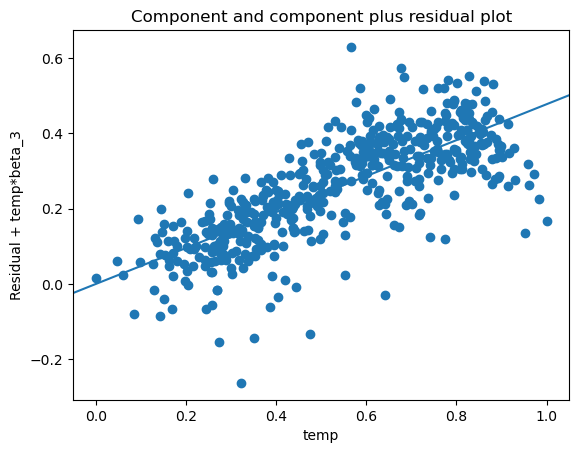

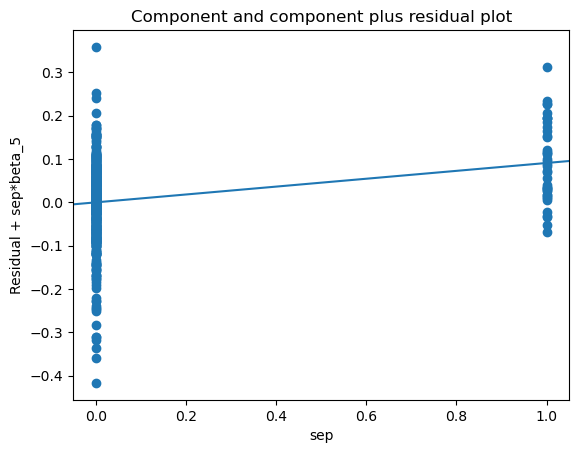

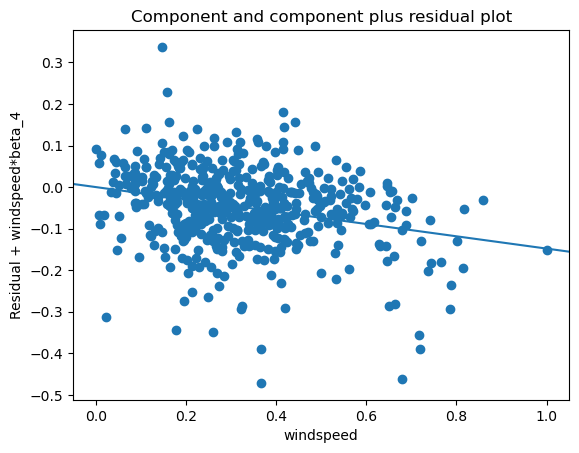

In [151]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lm6, 'windspeed')
plt.show()

In [152]:
# it is clearly visible that the Linearity is exists in the aboeve random CCPR

# Homoscedasticity to observe the error term is constant across the model in change of the independant variable

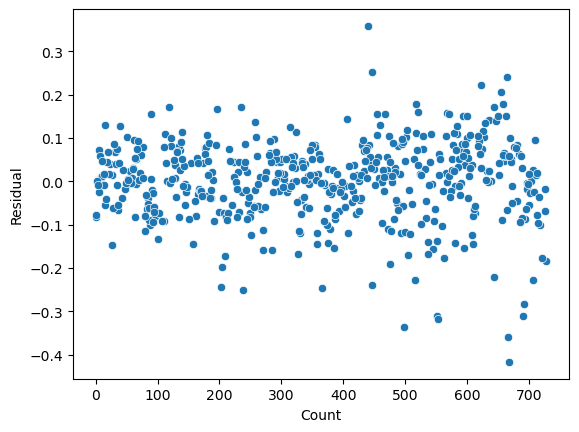

In [156]:
y_train_pred = lm6.predict(x_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [157]:
#No visible pattern observed from above plot for residuals.
#Independence of residuals

Let's test the model on the test data set 

In [158]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [159]:
y_test = df_test.pop('cnt')
X_test = df_test

In [191]:
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [193]:
# to make sure the test data in sync with the model we developed we removed the following columns 
X_test_lm_6 = X_test_lm_6.drop(['dec','jan','july','nov'],axis =1)

In [195]:
lm6.params
y_pred = lm6.predict(X_test_lm_6)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

#Model Evaluation

Text(0, 0.5, 'y_pred')

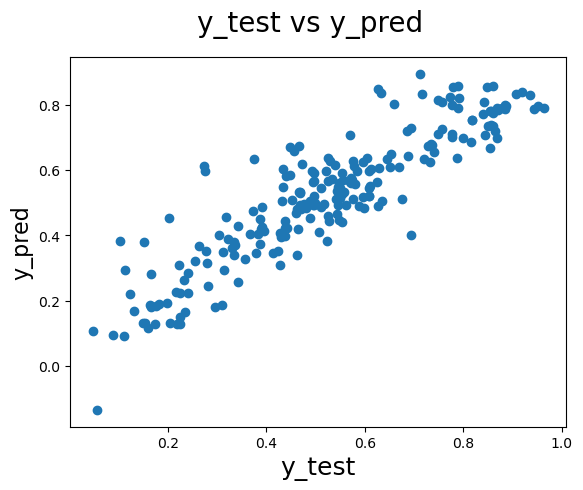

In [196]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [198]:
round(lm6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

In [199]:
#We can see that the equation of our best fitted line is:
#cnt = 0.1909+0.2341*year-0.0963*holiday+0.4777*temp-0.1481*windspeed+0.0910*sep-0.2850*Light_snowrain-0.0787*Misty-0.0554*spring+0.0621*summer+0.0945*winter


In [200]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7904


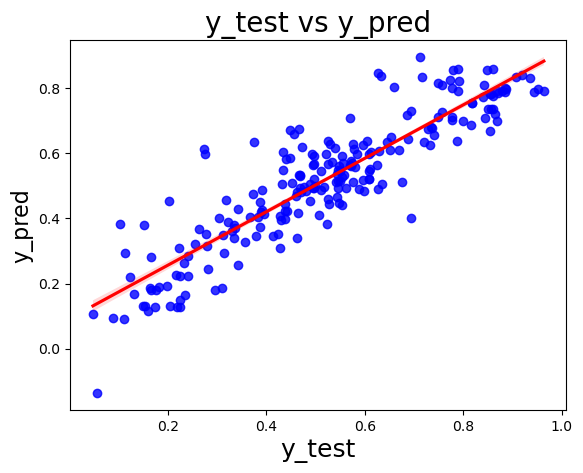

In [201]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.8038
- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.7944
Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.